# This notebook explores the Weinberg method 1996 
# in a descrete Spherical Hernquist halo.

# To-Do 

- Check resuts of the variance from biff an cov_matrix.c
- Effect of the r_s in the smoothening / PCA
- Write script the method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import biff
from scipy import linalg
from read_cov_matrix import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [87]:
# Reading Halo data

In [3]:
halo_data = np.loadtxt('../data/spherical_halo.txt')

x = halo_data[:,0]
y = halo_data[:,1]
z = halo_data[:,2]

M = halo_data[:,3]
xyz = np.array([x, y, z]).T

In [4]:
r_s = 40.85

In [5]:
Sspheric_s, Tspheric_s = biff.compute_coeffs_discrete(xyz.astype(np.float64), M.astype(np.float64), 5, 5, r_s, compute_var=True)


In [88]:
# Selecting coefficients with m<=l
index = np.where(Sspheric_s[0].flatten()!=0)[0]
Sspheric = Sspheric_s[0].flatten()[index]

# Visualizing $S_{nlm}$

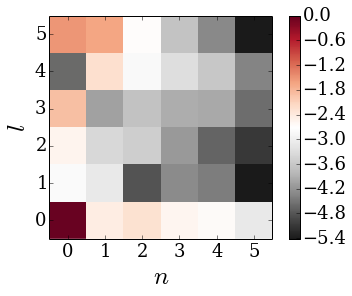

In [89]:
plt.imshow(np.log10(np.abs(Sspheric_s[0][:,:,0])/np.max(np.abs(Sspheric_s[0][:,:,0]))).T, origin='lower', 
       interpolation='None', cmap = 'RdGy_r')

plt.colorbar()
plt.xlabel('$n$', fontsize=25)
plt.ylabel('$l$', fontsize=25)

# computing $b$ 

In [90]:
# reading covariance matrix
cov_matrix = np.loadtxt('../data/cov_mat_sph_5x5.txt', skiprows=1)
cov_mat = read_cov_mat(cov_matrix, 5, 5)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


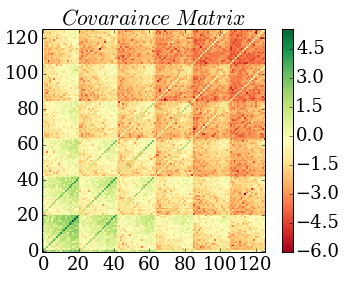

In [92]:
plt.imshow(np.log10(np.abs(cov_mat)).T, origin='lower', interpolation='None', cmap = 'RdYlGn')
colorbar()
title('$Covaraince\ Matrix$')


In [93]:
# Reading Diagonal of covaraince martrix = variance
var_S = np.zeros(len(cov_mat))
for i in range(len(cov_mat)):
    var_S[i] = cov_mat[i][i]

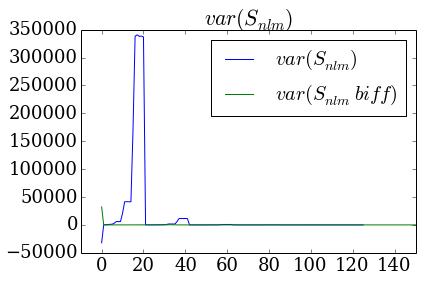

In [95]:
# check this with m**2.0!
title('$var(S_{nlm})$')
plot(var_S, label='$var(S_{nlm})$')
plot(np.abs(Sspheric_s[1].flatten()-Sspheric_s[0].flatten()**2.0), label='$var(S_{nlm}\ biff)$')
xlim(-10, 150)
legend(fontsize=20)
#xlim(-10, 150)

In [98]:
def b(a, var_a):
    """
    Function that computing the smooehtninf!
    """
    b = np.zeros(len(a))
    for i in range(len(b)):
        if var_a[i]==a[i]==0:
            b[i] = 0.0
        else:
            b[i] = 1./(1. + var_a[i]/a[i]**2.0)
    return b


(-10, 130)

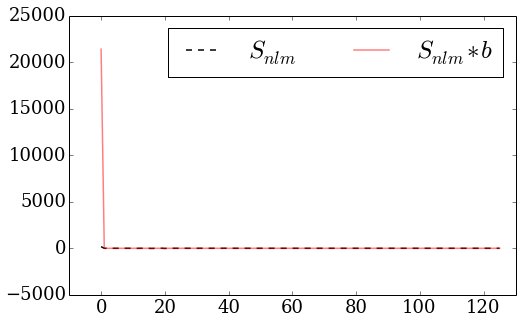

In [103]:
b_s = b(Sspheric, var_S)
b_s_m2 = b(Sspheric_s[0].flatten(), Sspheric_s[1].flatten()-Sspheric_s[0].flatten()**2.0)

figure(figsize=(8,5))
plot(Sspheric, lw=1.5, label='$S_{nlm}$', c='k', ls='--')
plot(b_s*Sspheric, lw=1.5, label='$S_{nlm}*b$', c='r', ls='-', alpha=0.5)
#plot(b_s_m2*Sspheric_s[0].flatten(), lw=1.0, label='$S_{nlm}*b_biff$')
legend(ncol=3, fontsize=25)
xlim(-10, 130)
#ylim(0, 300)

# PCA 
# Building the outter product matrix

\begin{equation}
\tilde{S}_{nlm,n'l'm'} = \hat{S}_{nlm} \cdot \hat{S}_{n'l'm'}
\end{equation}

In [108]:
def outter_matrix(S):
    #out_matrix = np.zeros((len(S), len(S)))
    #for i in range(len(S)):
    #    for j in range(len(S)):
    #        out_matrix[i][j] = S[i]*S[j]
    out_matrix = np.multiply.outer(S,S)
    lambdas, eigenv = linalg.eig(out_matrix)
    return out_matrix, lambdas, eigenv

In [109]:
index = np.where(Sspheric_s[0].flatten()!=0)[0]
o_m, eigval, eigvec = outter_matrix(Sspheric_s[0].flatten()[index])
o_m_all, eigval_all, eigvec_all = outter_matrix(Sspheric_s[0].flatten())

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10


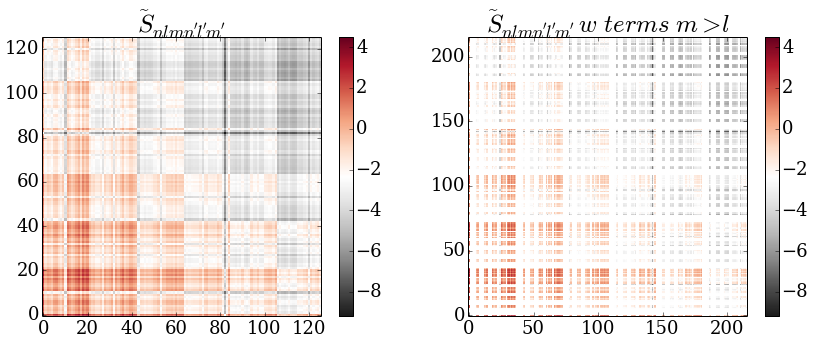

In [110]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title(r"$\tilde{S}_{nlmn' l'  m'}$", fontsize=25)
plt.imshow(np.log10(np.abs(o_m)).T, origin='lower', 
       interpolation='None', cmap = 'RdGy_r')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title(r"$\tilde{S}_{nlmn' l'  m'}\ w\ terms\ m>l$", fontsize=25)
plt.imshow(np.log10(np.abs(o_m_all)).T, origin='lower', 
       interpolation='None', cmap = 'RdGy_r')
plt.colorbar()



(-5, 126)

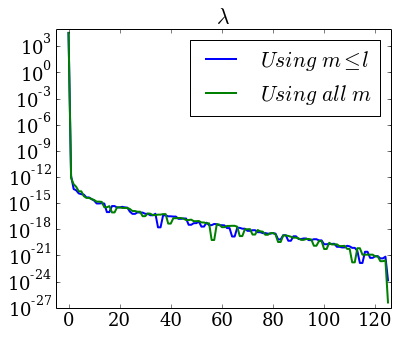

In [111]:
plt.figure(figsize=(6,5))
plt.title(r'$\lambda $')
plt.semilogy(np.abs(eigval.real), lw=2, label=r'$Using\ m\leq l$')
plt.semilogy(np.abs(eigval_all.real), lw=2, label='$Using\ all\ m$')
plt.legend()
plt.xlim(-5, 126)

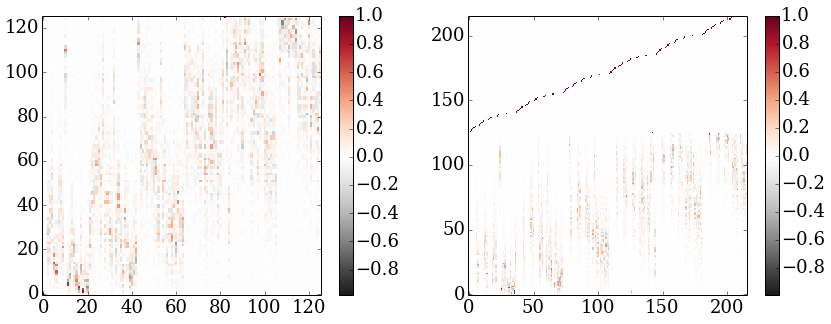

In [112]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(eigvec.real.T, origin='lower', 
       interpolation='None', cmap = 'RdGy_r')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(eigvec_all.real.T, origin='lower', 
       interpolation='None', cmap = 'RdGy_r')
#xlim(0, 126)
#ylim(0, 126)
plt.colorbar()

# $S^*_{nlm}$

In [113]:
def coeff_trans(S, T):
    new_S = np.dot(T,S).real
    return new_S

In [114]:
S_prime = coeff_trans(Sspheric_s[0].flatten()[index], eigvec.real)
S_prime_all = coeff_trans(Sspheric_s[0].flatten(), eigvec_all.real)

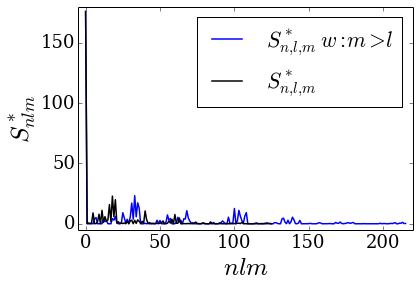

In [115]:
plot(np.abs(S_prime_all), lw=1.5, label=r'$S^*_{n,l,m}\ w: m>l$')
plot(np.abs(S_prime), lw=1.5, c='k', label=r'$S^*_{n,l,m}$')
legend(loc='best')
xlim(-5, 220)
ylim(-5, 180)
xlabel('$nlm$', fontsize=25)
ylabel('$S^*_{nlm}$', fontsize=25)

(-10, 250)

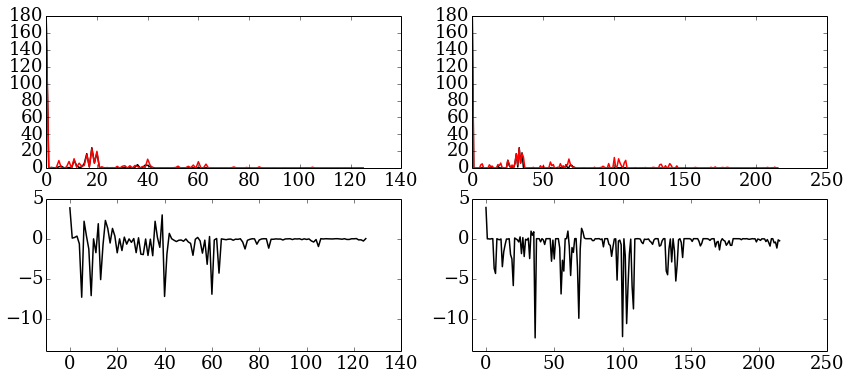

In [116]:
figure(figsize=(14,6))
subplot(2, 2, 1)
plot(np.abs(Sspheric_s[0].flatten()[index]), lw=1.5, c='k')
plot(np.abs(S_prime), lw=1.5, c='r')

subplot(2, 2, 3)
plot((np.abs(Sspheric_s[0].flatten()[index])-np.abs(S_prime)), lw=1.5, c='k')
ylim(-14, 5)
xlim(-10, 140)

subplot(2, 2, 2)
plot(np.abs(Sspheric_s[0].flatten()), lw=1.5, c='k')
plot(np.abs(S_prime_all), lw=1.5, c='r')

subplot(2, 2, 4)
plot(np.abs(Sspheric_s[0].flatten())-np.abs(S_prime_all), lw=1.5, c='k')
ylim(-14, 5)
xlim(-10, 250)

# $var(S_{nlm})^*$

In [117]:
def var_prime(cov_matrix, T_trans):
    T_daga = np.conjugate(T_trans).T
    var_prime = (np.dot(T_trans, np.dot(cov_matrix, T_daga)))
    return diagonal(var_prime.real)

In [118]:
var_prime_S = var_prime(cov_mat, eigvec.real)

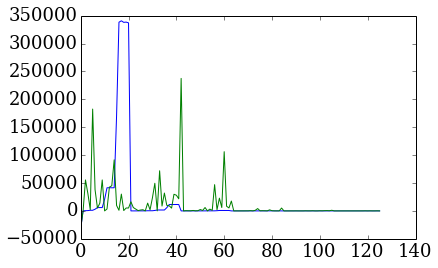

In [119]:
plot(var_S)
#plot(np.abs(Sspheric_s[1].flatten()-Sspheric_s[0].flatten()**2.0))
plot(var_prime_S)

# $b^*$

In [120]:
b_prime = b(S_prime, var_prime_S)


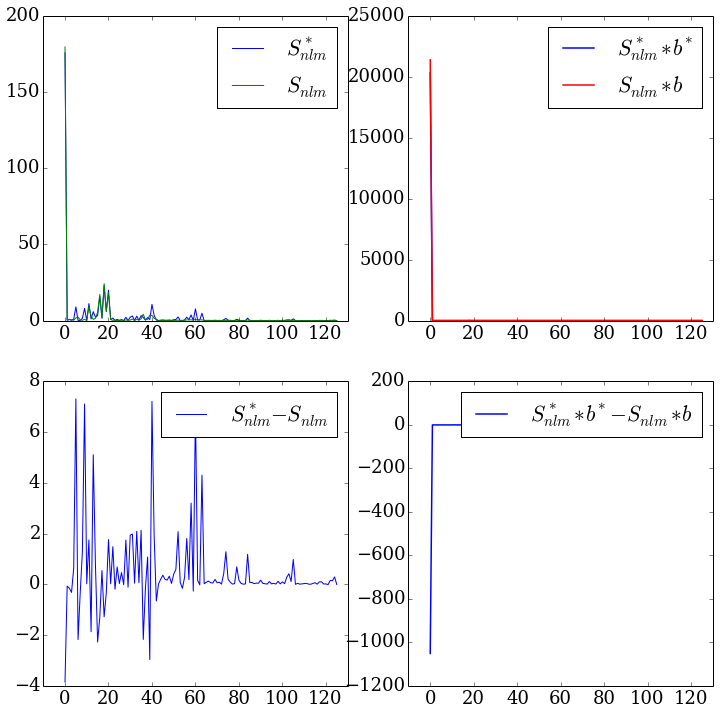

In [140]:
figure(figsize=(12, 12))

subplot(2, 2, 1)
plot(np.abs(S_prime),label='$S^*_{nlm}$')
plot(np.abs(Sspheric), label='$S_{nlm}$')
xlim(-10, 130)
ylim(0, 200)
legend()

subplot(2, 2, 2)
plot(np.abs(b_prime*S_prime), lw=1.5,label='$S^*_{nlm}*b^*$')
plot(np.abs(b_s*Sspheric), lw=1.5, label='$S_{nlm}*b$', c='r', ls='-')
xlim(-10, 130)
legend()

subplot(2, 2, 3)
plot(np.abs(S_prime)-np.abs(Sspheric),label='$S^*_{nlm}-S_{nlm}$')
xlim(-10, 130)
legend()

subplot(2, 2, 4)
plot((np.abs(b_prime*S_prime)-np.abs(b_s*Sspheric)), lw=1.5,label='$S^*_{nlm}*b^*-S_{nlm}*b$')
xlim(-10, 130)
legend()

# Signal to Noise 

In [156]:
def signal2noise(a, var_a):
    SN = (np.abs(a**2.0/var_a))**0.5
    return SN


In [157]:
sn_s = signal2noise(Sspheric, var_S)
sn_s_prime = signal2noise(S_prime, var_prime_S)

(-10, 126)

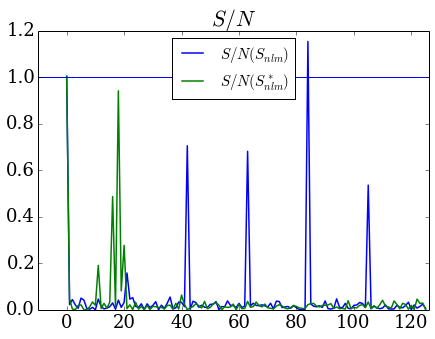

In [178]:
figure(figsize=(7,5))
title('$S/N$')
plot(sn_s, label='$S/N (S_{nlm})$', lw=1.5)
plot(sn_s_prime, label='$S/N (S^*_{nlm})$', lw=1.5)
legend(fontsize=15, loc='best')
axhline(1)
xlim(-10, 126)

# MISE

In [161]:
def mise(b_s, var_a, a):
    D = np.zeros(len(a))
    for i in range(len(D)):
        D[i] = np.nansum(b_s[:i+1]**2.*var_a[:i+1] + (b_s[:i+1]-1)**2.0*a[:i+1]**2.0)
    return D


In [162]:
D = mise(b_s, var_S, Sspheric)
D_prime = mise(b_prime, var_prime_S, S_prime)

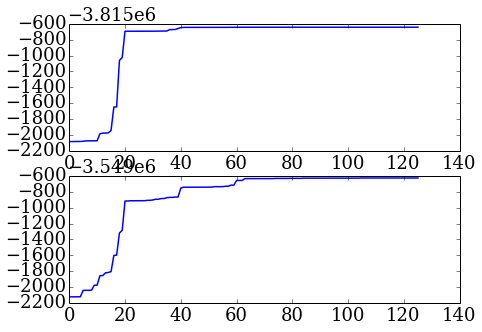

In [174]:
figure(figsize=(7, 5))
subplot(2, 1, 1)
plot(D, lw=1.5)
subplot(2, 1, 2)
plot(D_prime, lw=1.5)